In [31]:
from sklearn.datasets import fetch_openml
import numpy as np

Foi feito a importação dos dados, de um base onde tem imagens de números desenhados, é a primeira base de dados que normalmente se usa.

In [43]:
mnist = fetch_openml('mnist_784', version=1,as_frame=False)

Foi verificado

In [3]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

Definido os dados de entradas X e os dados de saida y, para fazer os treinamentos e testes e verificou os tamanhos de cada base de dados, no caso são 70000 dados, e as imagens são de 28 X 28 que da 784 

In [4]:
X, y = mnist["data"], mnist["target"]
X.shape

(70000, 784)

In [6]:
y.shape

(70000,)

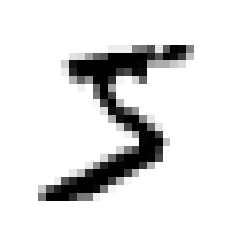

In [46]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

some_digit = some_digit = X.iloc[0,:].values

some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap=mpl.cm.binary)
plt.axis("off")

plt.show()

Foi feito o embaralhamento dos dados, para que haja um melhor treino e teste desses dados

In [47]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]


Agora vamos treinar um número 5

In [49]:
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

Para isso vamos utilizar o classificados de gradiente SGDClassifier, que é bom para dados muito extensões

In [50]:
from sklearn.linear_model import SGDClassifier

In [51]:
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

In [53]:
sgd_clf.predict([some_digit])

array([ True])

Codigo de um validação cruzada, nesse techo vamos ver porque a base de estimativa não é tão usada.

In [60]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

É verificado que houve quase 95% porcento de acertos, na hora de identificar so números 5

In [61]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")


array([0.95035, 0.96035, 0.9604 ])

Contudo no código abaixo vamos verificar a quantidade de números cincos existentes e é possivel verificar que temos 10% de números 5, o que daria uma acerto de 90%, o que mostra que não é confiavel o uso desse metodo

In [62]:
from sklearn.base import BaseEstimator

In [64]:
class Never5Classifier(BaseEstimator):
    def fit(self, X,y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X),1), dtype=bool)

In [65]:
never_5_clf = Never5Classifier()
cross_val_score(never_5_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.91125, 0.90855, 0.90915])

Para utilizar um método mais confiavel, pode utilizar o de matrix de confusão, onde gerara uma matriz de verdadeiros e falsos, quando o modelo fizer os testes

In [66]:
from sklearn.model_selection import cross_val_predict

In [67]:
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

In [68]:
y_train_pred

array([ True, False, False, ...,  True, False, False])

Foi identificados que 53892 foram corretamente identificados com não 5 e 687 falsos positivos e 1891 foram identificados incorretamentes como 5 e 3530 corretamente como positivos

In [69]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_5, y_train_pred)

array([[53892,   687],
       [ 1891,  3530]], dtype=int64)

Abaixo esta a matriz que seria perfeita, onde o lado direito da primeira coluna estaria zerado e a segunda coluna lado esquerdo estaria zerado

In [70]:
y_train_perfect_predictions = y_train_5
confusion_matrix(y_train_5, y_train_perfect_predictions)

array([[54579,     0],
       [    0,  5421]], dtype=int64)

Agora vamos para uma metrica mais precisa para ver, a precisão e o recal

precisão = tp / tp + fp

Precisão é proporção de números positivos

tp = ao acertos
fp = aos falsos positivos

o Recal é:
recall = tp / tp + fn
fn = aos falsos negativos

Recall é a proporção de números positivas que são dectadas

In [71]:
from sklearn.metrics import precision_score, recall_score

In [72]:
precision_score(y_train_5, y_train_pred)

0.8370879772350012

In [73]:
recall_score(y_train_5, y_train_pred)

0.6511713705958311

Tem como unir esses dois em um chamado F1

In [74]:
from sklearn.metrics import f1_score

In [75]:
f1_score(y_train_5, y_train_pred)

0.7325171197343846